# Linear Models for Classification

This chapter is about performing classification using linear discriminant functions. The discriminant functions are constructed by using a simple linear model $f(x) = w^Tx + w_0$ and setting all values of x to 0 where $f(x) > 0$. The boundary is where $f(x)$ = 0, i.e. where the weight matrix $W^Tx = 0$. For this reason the decision boundary will always be orthogonal to the weight matrix. For $K$ class classification we try to fit such a weight matrix k times. Different than with linear regresiion we now have a one-hot vector $t$ which we regress onto the input matrix.  Since we want to find a matrix that maps the data points from x closest to t we basically are trying to find the inverse from x on t since that would give us W. This can be done using the pseudo-inverse (since x usually isnt square) and is defined as 

$$
W = (X^TX)^{-1}X^TT
$$

Just as with simple linear regression

In [72]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [73]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3)

In [74]:
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1))
df.columns = ['x1', 'x2', 'label']

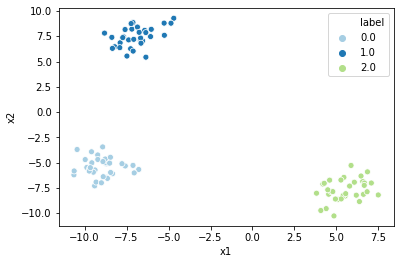

In [75]:
sns.scatterplot(x='x1', y='x2', hue='label', data=df, palette="Paired")
plt.show()

In [76]:
# Augment  the matrix X such that the bias is included in the matrix multiplication
X = np.concatenate([np.ones((100, 1)), X], axis=1)
# Create one-hot matrix of the target label
T = pd.get_dummies(y).values

In [77]:
# Calculate the Morgan-Penrose pseudo inverse
W = np.linalg.inv(X.T @ X) @ X.T @ T
print(W.shape)

(3, 3)


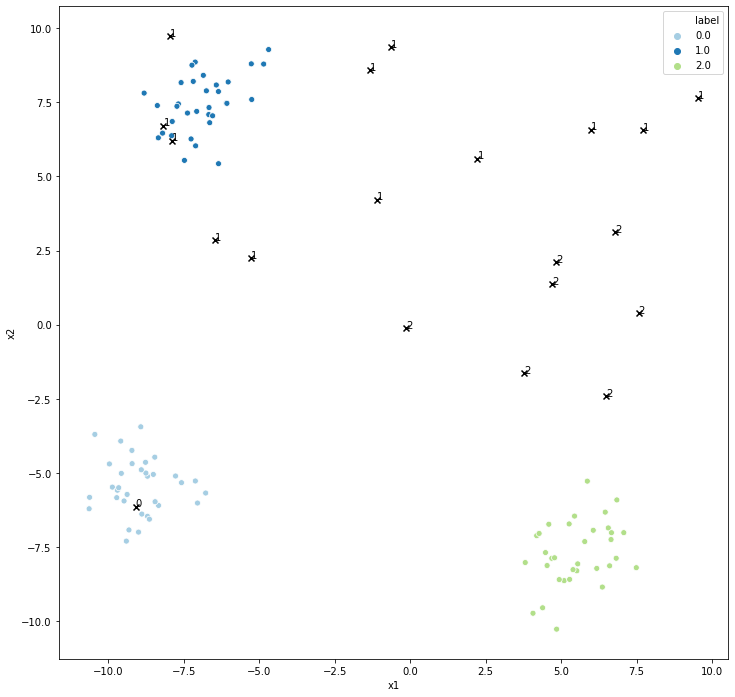

In [137]:
# To show that it works, sample 20 new test datapoints and assign to the max value after the linear transformation
X_test = np.random.uniform(-10, 10, (2, 20))
X_test = np.concatenate([np.ones((1, 20)), X_test], axis=0)
predictions = np.argmax(W.T @ X_test, axis=0)

plt.figure(figsize=(12,12))
sns.scatterplot(x='x1', y='x2', hue='label', data=df, palette="Paired")
for index, label in enumerate(np.unique(predictions)):
    subset = X_test.T[predictions == label]
    plt.scatter(subset[:,1], subset[:,2], c='black', marker='x')
    
    for item in subset:
        plt.text(item[1], item[2], label)
    
plt.show()